<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-Means Clustering
* ตัวอย่าง

https://scikit-learn.org/stable/modules/clustering.html

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

https://www.geeksforgeeks.org/k-means-clustering-introduction/

https://www.kaggle.com/code/mahmoudlimam/chronic-kidney-disease-clustering-and-prediction


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/ckdresearch2023/Assign/Assign7: Outliers/outlier_missfr.xlsx")

In [ ]:
df.head()

,PatientUID,PatientVisitUID,Slopes,InPatient,OutPatient,Emergency,time_t1,eGFR_t1,VisitLocation,StartDTTM,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,LabLocation
0,2299,3386255,-7.158596,0,1,0,2017-10-03 09:19:54.710,63.60,เวชปฏิบัติทั่วไป (OPD)-D03,2016-08-15 08:13:26.043,...,4.9248,194.24,91.0,5.284,215.0,81.0,123.0,99.0,21.019,1
1,2299,4546471,5.550691,0,1,0,2018-12-12 09:18:49.913,70.20,เวชปฏิบัติทั่วไป (OPD)-D03,2017-10-03 07:37:22.777,...,5.1634,251.46,86.0,5.755,219.0,64.0,146.0,73.0,15.198,1
2,2299,5812902,-6.063710,0,1,0,2019-12-19 09:51:24.427,64.02,เวชปฏิบัติทั่วไป (OPD)-D03,2018-12-12 07:58:57.190,...,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,30.879,1
3,2299,6947220,-12.812245,0,1,0,2021-03-04 10:01:42.113,48.54,เวชปฏิบัติทั่วไป (OPD)-D03,2019-12-19 08:19:38.647,...,4.3718,204.65,89.0,5.562,205.0,69.0,139.0,76.0,36.916,1
4,2299,8186767,28.287500,0,1,0,2022-04-21 08:45:54.580,80.47,เวชปฏิบัติทั่วไป (OPD)-D03,2021-03-04 07:55:40.703,...,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,28.684,1


In [ ]:
df.columns

Index(['PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient', 'OutPatient',
       'Emergency', 'time_t1', 'eGFR_t1', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failu

In [6]:
data = ['Slopes', 'eGFR_t1',  'Age', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data = df[data]

feature scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler
cols = data.columns
ms = MinMaxScaler()
data = ms.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])

In [8]:
data.describe()

,Slopes,eGFR_t1,Age,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
count,52620.000000,52620.000000,52620.000000,52620.00000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,...,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000,52620.000000
mean,0.413315,0.366446,0.581105,0.02435,0.075168,0.005238,0.010291,0.031097,0.043654,0.003505,...,0.568475,0.210466,0.223322,0.084826,0.229028,0.175434,0.142607,0.351101,0.182648,0.176909
std,0.052640,0.117914,0.138650,0.07428,0.107584,0.040448,0.058314,0.093145,0.130048,0.037639,...,0.074932,0.079444,0.077557,0.051841,0.127199,0.048737,0.086660,0.119838,0.072224,0.116325
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.390658,0.300212,0.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.526866,0.161955,0.176836,0.055848,0.145455,0.147129,0.089064,0.272414,0.136364,0.079804
50%,0.415804,0.376836,0.583333,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.574000,0.199703,0.217166,0.067439,0.185909,0.172309,0.116029,0.344828,0.170455,0.153156
75%,0.438370,0.437288,0.678571,0.00000,0.175000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.620328,0.242583,0.262668,0.096315,0.272727,0.196977,0.175227,0.406897,0.226023,0.252421
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##K-means

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# สร้างตัวแปร X จากข้อมูลที่ให้มา
X = data

# ทดลองจำนวน clusters ตั้งแต่ 1 ถึง 10
inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

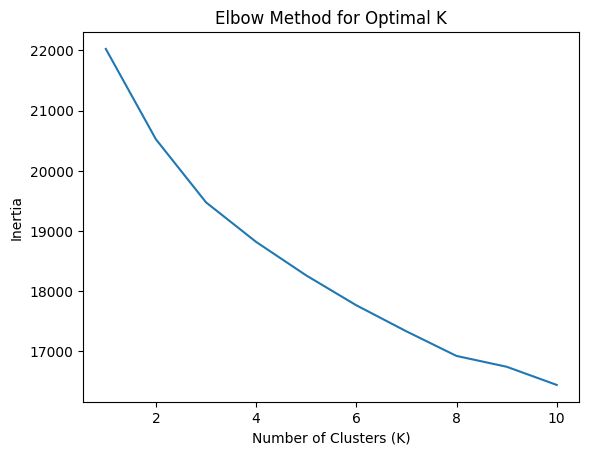

In [20]:
# พล็อตกราฟ Elbow
plt.plot(K_range, inertia_values)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [21]:
from sklearn.cluster import KMeans

# กำหนดจำนวน clusters (K)
K = 8

# ทำ K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
data.head()

,Slopes,eGFR_t1,Age,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster
0,0.386475,0.439972,0.654762,0.246575,0.000,0.000,0.000000,0.0,0.0,0.0,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,2
1,0.454843,0.486582,0.666667,0.246575,0.225,0.000,0.000000,0.0,0.0,0.0,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,2
2,0.392365,0.442938,0.678571,0.273973,0.250,0.170,0.000000,0.0,0.0,0.0,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,2
3,0.356062,0.333616,0.690476,0.095890,0.000,0.005,0.138889,0.0,0.0,0.0,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,2
4,0.577153,0.559110,0.714286,0.273973,0.000,0.075,0.000000,0.0,0.0,0.0,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,2


##DBSCAN

In [31]:
data = ['Slopes', 'eGFR_t1',  'Age', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L1-eGFR', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
data = df[data]

In [32]:
from sklearn.preprocessing import MinMaxScaler
cols = data.columns
ms = MinMaxScaler()
data = ms.fit_transform(data)
data = pd.DataFrame(data, columns=[cols])

In [40]:
# Import libraries
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# สร้าง subset ของข้อมูลที่ใช้ใน clustering
subset_data = data

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_data)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)

# Add the cluster labels to the original data frame
data['Cluster'] = clusters


In [41]:
data.head()

,Slopes,eGFR_t1,Age,G1M2-ARB,G3M1-Statin,G5M2-NSAIDs,G1M5-Diuretic,G1M7-Beta-blocker,G1M3-Dihydropyridine-CCB,G1M6-MRA,...,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio,Cluster
0,0.386475,0.439972,0.654762,0.246575,0.000,0.000,0.000000,0.0,0.0,0.0,...,0.128265,0.168811,0.053741,0.116727,0.222488,0.072967,0.389655,0.448864,0.042122,-1
1,0.454843,0.486582,0.666667,0.246575,0.225,0.000,0.000000,0.0,0.0,0.0,...,0.136593,0.227983,0.048472,0.159545,0.227273,0.052632,0.468966,0.301136,0.030457,-1
2,0.392365,0.442938,0.678571,0.273973,0.250,0.170,0.000000,0.0,0.0,0.0,...,0.284817,0.291624,0.063224,0.118182,0.196172,0.050239,0.410345,0.255682,0.061882,-1
3,0.356062,0.333616,0.690476,0.095890,0.000,0.005,0.138889,0.0,0.0,0.0,...,0.108963,0.179576,0.051633,0.142000,0.210526,0.058612,0.444828,0.318182,0.073980,-1
4,0.577153,0.559110,0.714286,0.273973,0.000,0.075,0.000000,0.0,0.0,0.0,...,0.145550,0.416753,0.050580,0.136364,0.202153,0.064593,0.410345,0.227273,0.057483,-1
